In [1]:
# Below code found at https://github.com/jupyterlite/jupyterlite/issues/119
import pandas as pd 
#import micropip
#package_url = "https://raw.githubusercontent.com/innovationOUtside/ouseful_jupyterlite_utils/main/ouseful_jupyterlite_utils-0.0.1-py3-none-any.whl"
#await micropip.install(package_url)

#from ouseful_jupyterlite_utils import pandas_utils as pdu

# use this approach if CSV data is at a remote URL
# Via @jtpio
#URL = "https://raw.githubusercontent.com/edgecollective/wastewater-parse/main/waste.csv"
df = pd.read_csv('test_by_date.csv')


In [2]:
df

,Date,Molecular Total,Molecular New,Molecular Positive New,Antigen Positive New,Antigen New,Antigen Total,All Antigen Tests,All Positive Antigen Tests,First Molecular Test per person,...,All Molecular Tests_MA without Higher ED,All Positive Molecular Tests_MA without Higher ED,7-day weighted average positive test rate all molecular tests in MA,7-day weighted average positive test rate all molecular tests_Higher Ed ONLY,7-day weighted average positive test rate all molecular tests_MA without Higher ED,7-day average All Molecular Tests,7-day average daily molecular tests_MA without Higher ED,7-day average daily molecular tests_Higher ED ONLY,7-day average daily POSITIVE molecular tests_MA without Higher ED,7-day average daily POSITIVE molecular tests_Higher ED ONLY
0,1/22/2020,1,1,0,0,0,0,0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/2020,2,1,0,0,0,0,0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/24/2020,2,0,0,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/25/2020,2,0,0,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/26/2020,2,0,0,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2/25/2022,11150206,4928,343,50,1668,2069327,3552,52,NaN,...,NaN,NaN,0.02072159339,NaN,NaN,47783.14286,NaN,NaN,NaN,NaN
766,2/26/2022,11157961,7755,587,62,1604,2070931,2444,67,NaN,...,NaN,NaN,0.02054857625,NaN,NaN,48067.28571,NaN,NaN,NaN,NaN
767,2/27/2022,11164944,6983,494,62,1412,2072343,2551,64,NaN,...,NaN,NaN,0.02015857125,NaN,NaN,48090.14286,NaN,NaN,NaN,NaN
768,2/28/2022,11179226,14282,815,141,2193,2074536,4981,153,NaN,...,NaN,NaN,0.01836710577,NaN,NaN,50774.00000,NaN,NaN,NaN,NaN


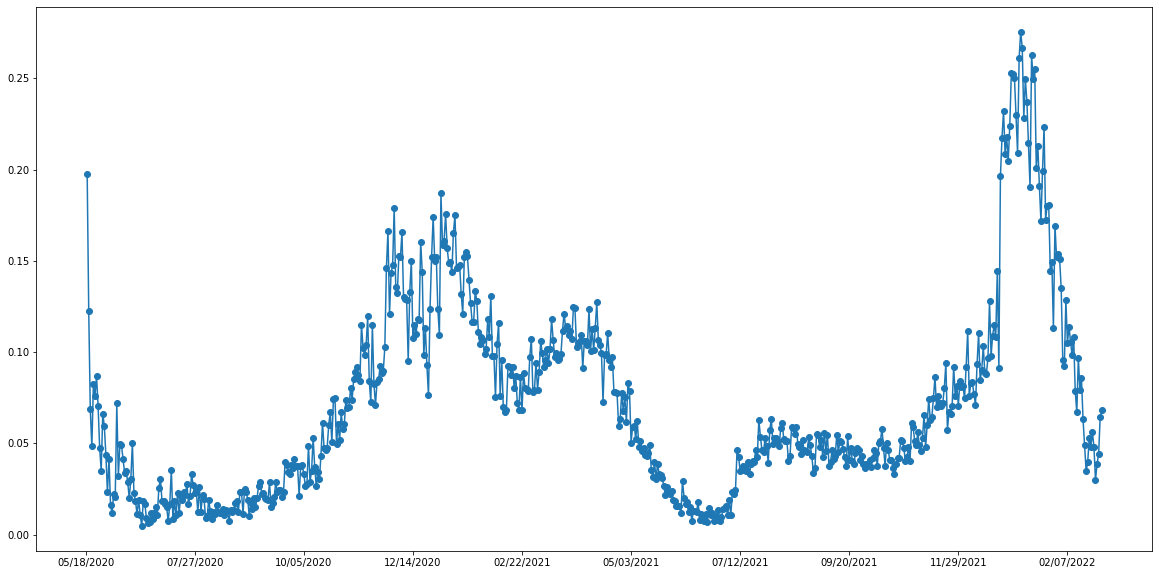

In [3]:
import matplotlib.pyplot as plt
import datetime as dt

dates=df['Date'].to_numpy()
#mol_total = df.iloc[:,[1]]
ant_new =  df.iloc[:,[5]].to_numpy()
ant_pos_new =  df.iloc[:,[4]].to_numpy()

x_a=[]
y_a=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    if (float(ant_pos_new[i]) > 0.):
        this_positivity = float(ant_pos_new[i])/float(ant_new[i])
        #this_positivity = mol_pos_new[i]
        #print(mol)
        #this_positivity = float(mol_pos_new[i])/100.
        d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
        if (this_positivity < .8):
            x_a.append(d)
            y_a.append(this_positivity)

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

#max_counts = 1000
#head=400
#tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
plt.plot(x_a,y_a,'-o')
#plt.ylim([0,max_counts])
#plt.ylabel('copies/mL')
#plt.xlabel('date')
#plt.title(region+' region\nMax_counts='+str(max_counts))
#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 10)
#fig.suptitle(region +' -- initial vs final\nmax_counts='+str(max_counts), fontsize=16)

#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
plt.show()

NameError: name 'x' is not defined

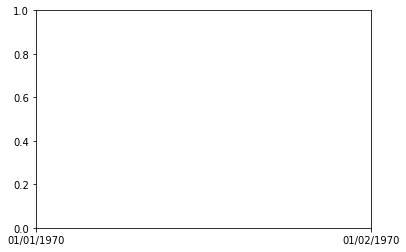

In [4]:
import matplotlib.pyplot as plt
import datetime as dt

dates=df['Date'].to_numpy()
#mol_total = df.iloc[:,[1]]
mol_new =  df.iloc[:,[2]].to_numpy()
mol_pos_new =  df.iloc[:,[3]].to_numpy()

x_m=[]
y_m=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    if (float(mol_pos_new[i]) > 0.):
        this_positivity = float(mol_pos_new[i])/float(mol_new[i])
        #this_positivity = mol_pos_new[i]
        #print(mol)
        #this_positivity = float(mol_pos_new[i])/100.
        if (this_positivity < .8):
            d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
            x_m.append(d)
            y_m.append(this_positivity)

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

#max_counts = 1000
#head=400
#tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
plt.plot(x,y,'-o')
#plt.ylim([0,max_counts])
#plt.ylabel('copies/mL')
#plt.xlabel('date')
#plt.title(region+' region\nMax_counts='+str(max_counts))
#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 10)
#fig.suptitle(region +' -- initial vs final\nmax_counts='+str(max_counts), fontsize=16)

#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
plt.show()

In [5]:
import matplotlib.pyplot as plt
import datetime as dt

dg = pd.read_csv('waste.csv')

region = 'Northern'
dates=dg['Date'].to_numpy()
counts_n=dg['Northern'].to_numpy()
counts_s=dg['Southern'].to_numpy()


In [6]:
x_w_n=[]
x_w_s=[]
y_w_n=[]
y_w_s=[]
x_w_t=[]
y_w_t=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    this_count_n = str(counts_n[i])
    this_count_s = str(counts_s[i])
    if (len(this_date.split(" "))==1):
        if (len(this_count_n)>0) and (this_count_n != 'nan') and (len(this_count_n.split(" "))==1):
            if (len(this_count_s)>0) and (this_count_s != 'nan') and (len(this_count_s.split(" "))==1):
                
                d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
                
                x_w_n.append(d)
                y_w_n.append(float(this_count_n))
                
                x_w_s.append(d)
                y_w_s.append(float(this_count_s))

                x_w_t.append(d)
                y_w_t.append(float(this_count_s)+float(this_count_n))

In [7]:
import numpy as np
y_w_n_norm = np.array(y_w_n) / np.array(y_w_n).max()
y_w_s_norm = np.array(y_w_s) / np.array(y_w_s).max()

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

ave_window = 3

y_w_n_norm_run = running_mean(y_w_n_norm,ave_window)
#len(y_w_n_norm_run)
x_w_n_run = x_w_n[(ave_window-1):]

y_w_s_norm_run = running_mean(y_w_s_norm,ave_window)
#len(y_w_n_norm_run)
x_w_s_run = x_w_s[(ave_window-1):]


y_m_run = running_mean(y_m,ave_window)
x_m_run = x_m[(ave_window-1):]

#y_w_t = np.array(y_w_n) + np.array(y_w_s)
y_w_t_norm = np.array(y_w_t) / np.array(y_w_t).max()


ave_window = 3
y_w_t_norm_run = running_mean(y_w_t_norm,ave_window)
x_w_t_run = x_w_t[(ave_window-1):]

In [8]:
#len(x_w_n_run)
len(y_w_n_norm_run)

631

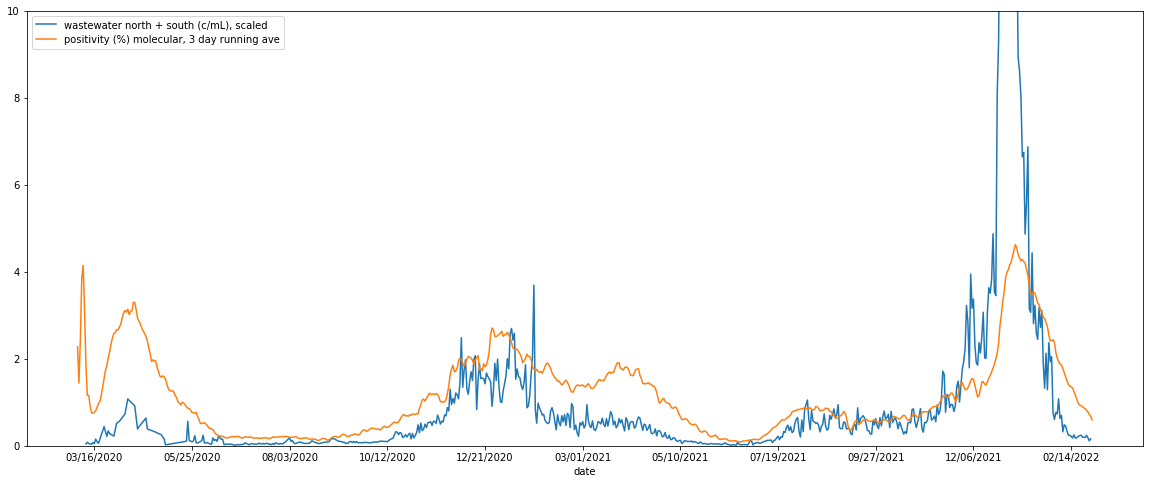

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

plt.plot(x_w_t,y_w_t_norm*20,'-',label='wastewater north + south (c/mL), scaled')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')

#plt.plot(x_m,y_m,'-',label = 'positivity (%) molecular')
plt.plot(x_m_run,y_m_run*10,'-',label = 'positivity (%) molecular, 3 day running ave')

#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
plt.ylim([0,10])
#plt.ylabel('copies/mL')
plt.xlabel('date')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
#plt.title('Positivity is the fraction of positive molecular tests on a given day')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

In [223]:
len(x_m)

730

In [226]:
dates = []
y_wastewater = []
y_positivity = []

for i in range(0,len(x_w_t)):
    w_date = x_w_t[i]
    for j in range(0,len(x_m)):
        #print(j)
        if (x_m[j]==w_date):
            dates.append(w_date)
            y_wastewater.append(y_w_t[i])
            y_positivity.append(y_m[i])
            #print(w_date)



In [270]:
#if normalize:
#    a = (a - mean(a)) / (std(a) * len(a))
#    v = (v - mean(v)) /  std(v)

yp = np.array(y_positivity)
yw = np.array(y_wastewater)

yp_norm = (yp - yp.mean()) / (yp.std() * len(yp))
yw_norm = (yw - yw.mean()) / (yw.std() * len(yw))

yp_norm_prime= (yp) / (yp.std() * len(yp))
yw_norm_prime = (yw) / (yw.std() * len(yw))


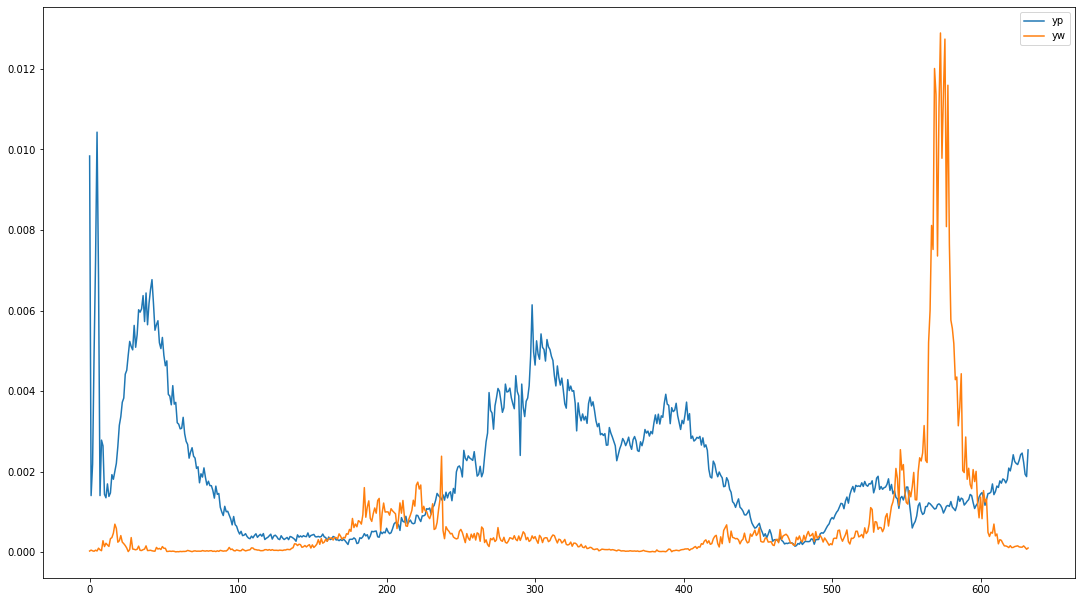

In [271]:
plt.plot(yp_norm_prime,label='yp')
plt.plot(yw_norm_prime,label='yw')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

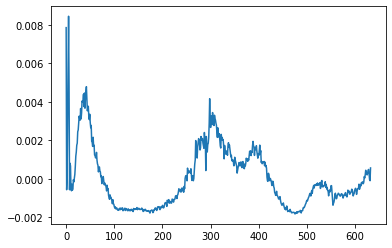

In [262]:
plt.plot(yp_norm)
plt.show()

In [257]:
corr = np.correlate(yp_norm,yp_norm)

In [258]:
corr

array([0.00157978])

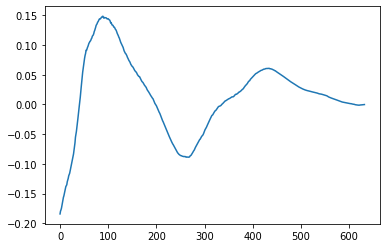

In [263]:
import statsmodels.api as sm
corr = sm.tsa.stattools.ccf(yp_norm, yw_norm, adjusted=False)
plt.plot(corr)
plt.show()

In [264]:
dates

[datetime.date(2020, 3, 10),
 datetime.date(2020, 3, 11),
 datetime.date(2020, 3, 12),
 datetime.date(2020, 3, 14),
 datetime.date(2020, 3, 15),
 datetime.date(2020, 3, 16),
 datetime.date(2020, 3, 17),
 datetime.date(2020, 3, 18),
 datetime.date(2020, 3, 19),
 datetime.date(2020, 3, 23),
 datetime.date(2020, 3, 25),
 datetime.date(2020, 3, 26),
 datetime.date(2020, 3, 27),
 datetime.date(2020, 3, 30),
 datetime.date(2020, 4, 1),
 datetime.date(2020, 4, 3),
 datetime.date(2020, 4, 7),
 datetime.date(2020, 4, 9),
 datetime.date(2020, 4, 14),
 datetime.date(2020, 4, 16),
 datetime.date(2020, 4, 17),
 datetime.date(2020, 4, 22),
 datetime.date(2020, 4, 23),
 datetime.date(2020, 4, 28),
 datetime.date(2020, 5, 3),
 datetime.date(2020, 5, 5),
 datetime.date(2020, 5, 6),
 datetime.date(2020, 5, 21),
 datetime.date(2020, 5, 22),
 datetime.date(2020, 5, 23),
 datetime.date(2020, 5, 24),
 datetime.date(2020, 5, 25),
 datetime.date(2020, 5, 26),
 datetime.date(2020, 5, 27),
 datetime.date(2020, 